# Day 09. Exercise 02
# Metrics

## 0. Imports

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')

In [3]:
x = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [5]:
svc = SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf')
svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', probability=True, random_state=21)

In [6]:
y_pred = svc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
y_score = svc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [7]:
dtc = DecisionTreeClassifier(max_depth=22, class_weight='balanced', random_state=21, criterion='gini')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=22, random_state=21)

In [8]:
y_pred = dtc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
y_score = dtc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.89053
precision is 0.89262
recall is 0.89053
roc_auc is 0.93664


## 4. Random forest

1. The same task for random forest.

In [9]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=28, random_state=21, criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=28, n_estimators=50, random_state=21)

In [10]:
y_pred = rfc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
y_score = rfc.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted')
# y = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])
# print(roc_curve(y, y_score))
fpr, tpr, treshold = roc_curve(y_test, y_score[:,1], pos_label=1)
print(f"roc_auc is {lr_auc:.5f}")
roc_auc = auc(fpr, tpr)

accuracy is 0.92899
precision is 0.93009
recall is 0.92899
roc_auc is 0.99033


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

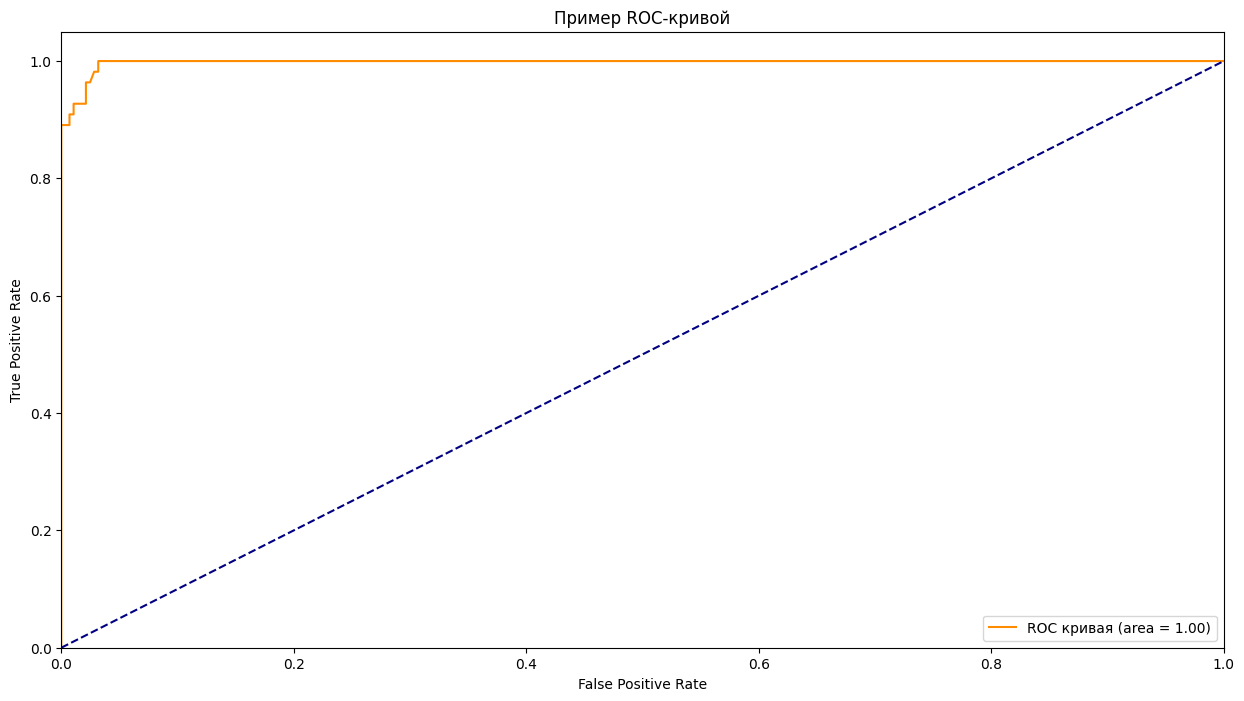

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Пример ROC-кривой')
ax.legend(loc="lower right")
plt.show()

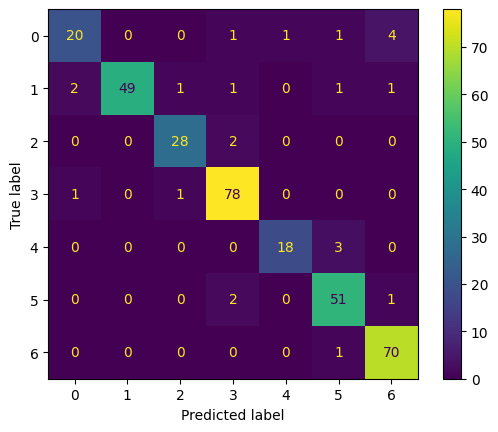

In [12]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [13]:
joblib.dump(rfc, '../data/model.joblib')

['../data/model.joblib']

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [14]:
def calculate_metrics(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    y_score = estimator.predict_proba(X_test)
    return {'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo')}